In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
path = "../datasets/nba.csv"
df = pd.read_csv(path)

In [52]:
print(f"Dimensions of the dataset: {df.shape}")

Dimensions of the dataset: (458, 9)


In [53]:
df.columns
print(f"Columns in the dataset: {list(df.columns)}")

Columns in the dataset: ['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight', 'College', 'Salary']


In [54]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [55]:
df.tail(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [57]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [58]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [59]:
team_count = df["Team"].value_counts().reset_index()
team_count.columns = ["Team", "Count"]
team_count

,Team,Count
0,New Orleans Pelicans,19
1,Memphis Grizzlies,18
2,New York Knicks,16
3,Milwaukee Bucks,16
4,Boston Celtics,15
5,Brooklyn Nets,15
6,Portland Trail Blazers,15
7,Oklahoma City Thunder,15
8,Denver Nuggets,15
9,Washington Wizards,15


In [60]:
team_college_count = df[["Team", "College"]].value_counts().reset_index()
team_college_count.columns = ["Team", "College", "Count"]
team_college_count

,Team,College,Count
0,Phoenix Suns,Kentucky,4
1,Memphis Grizzlies,North Carolina,3
2,Miami Heat,Duke,3
3,Sacramento Kings,Kentucky,3
4,Washington Wizards,Kansas,3
...,...,...,...
331,Houston Rockets,Charleston,1
332,Houston Rockets,Arkansas,1
333,Houston Rockets,Arizona State,1
334,Houston Rockets,Arizona,1


In [61]:
missing_values = df.isnull().sum()
null_df = pd.DataFrame(missing_values).reset_index()
null_df.columns = ["Feature", "Count"]
null_df

,Feature,Count
0,Name,1
1,Team,1
2,Number,1
3,Position,1
4,Age,1
5,Height,1
6,Weight,1
7,College,85
8,Salary,12


Text(0, 0.5, 'Count')

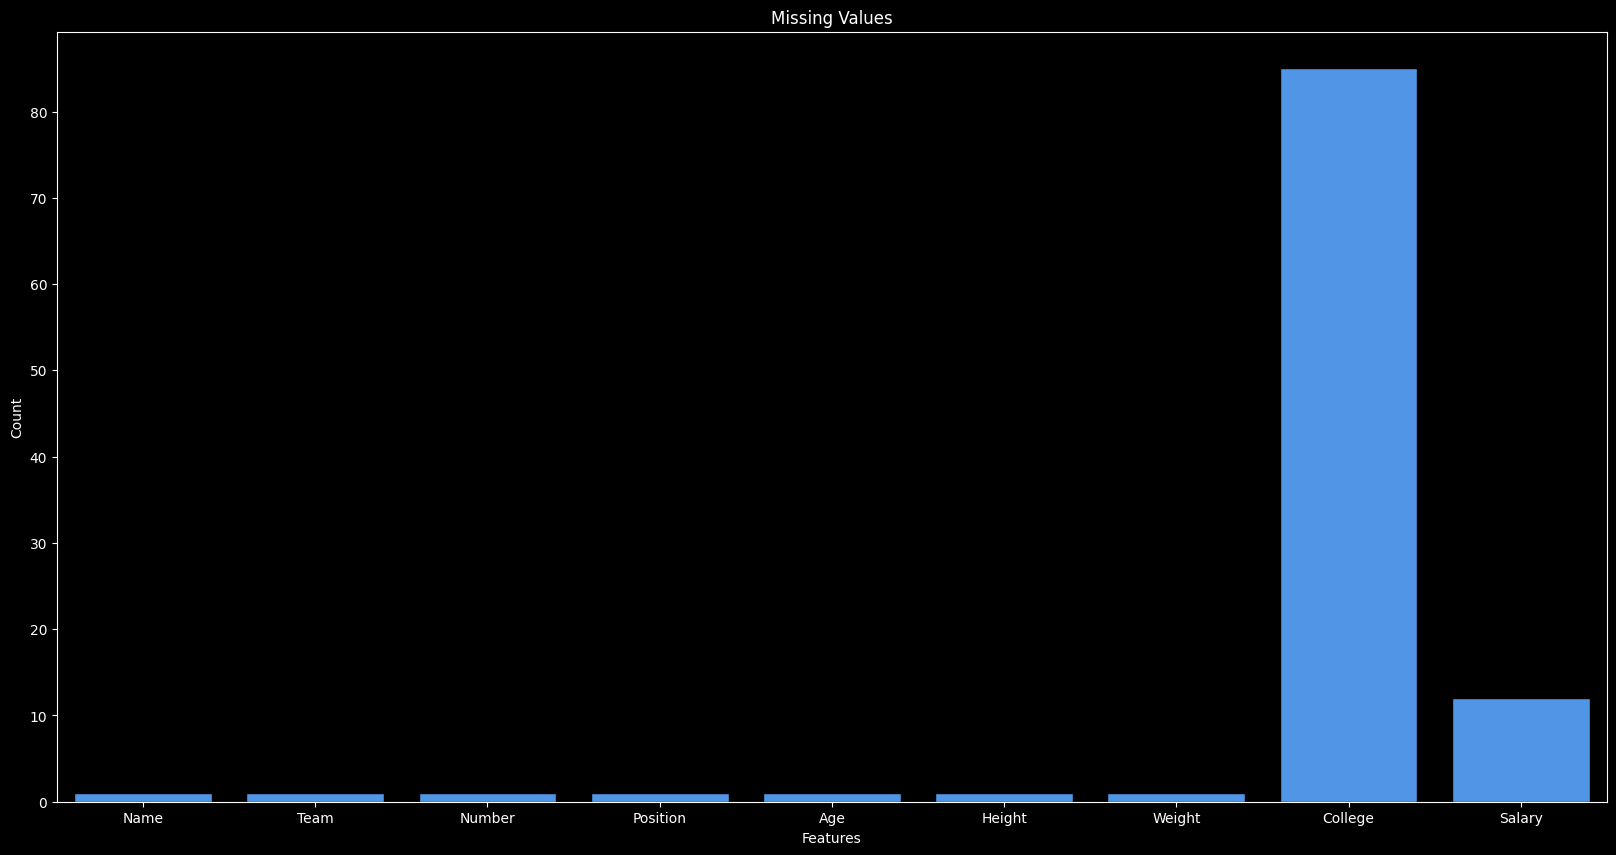

In [62]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x=missing_values.index, y=missing_values, color="#3894FF", edgecolor="black"
)
plt.title("Missing Values")
plt.xlabel("Features")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

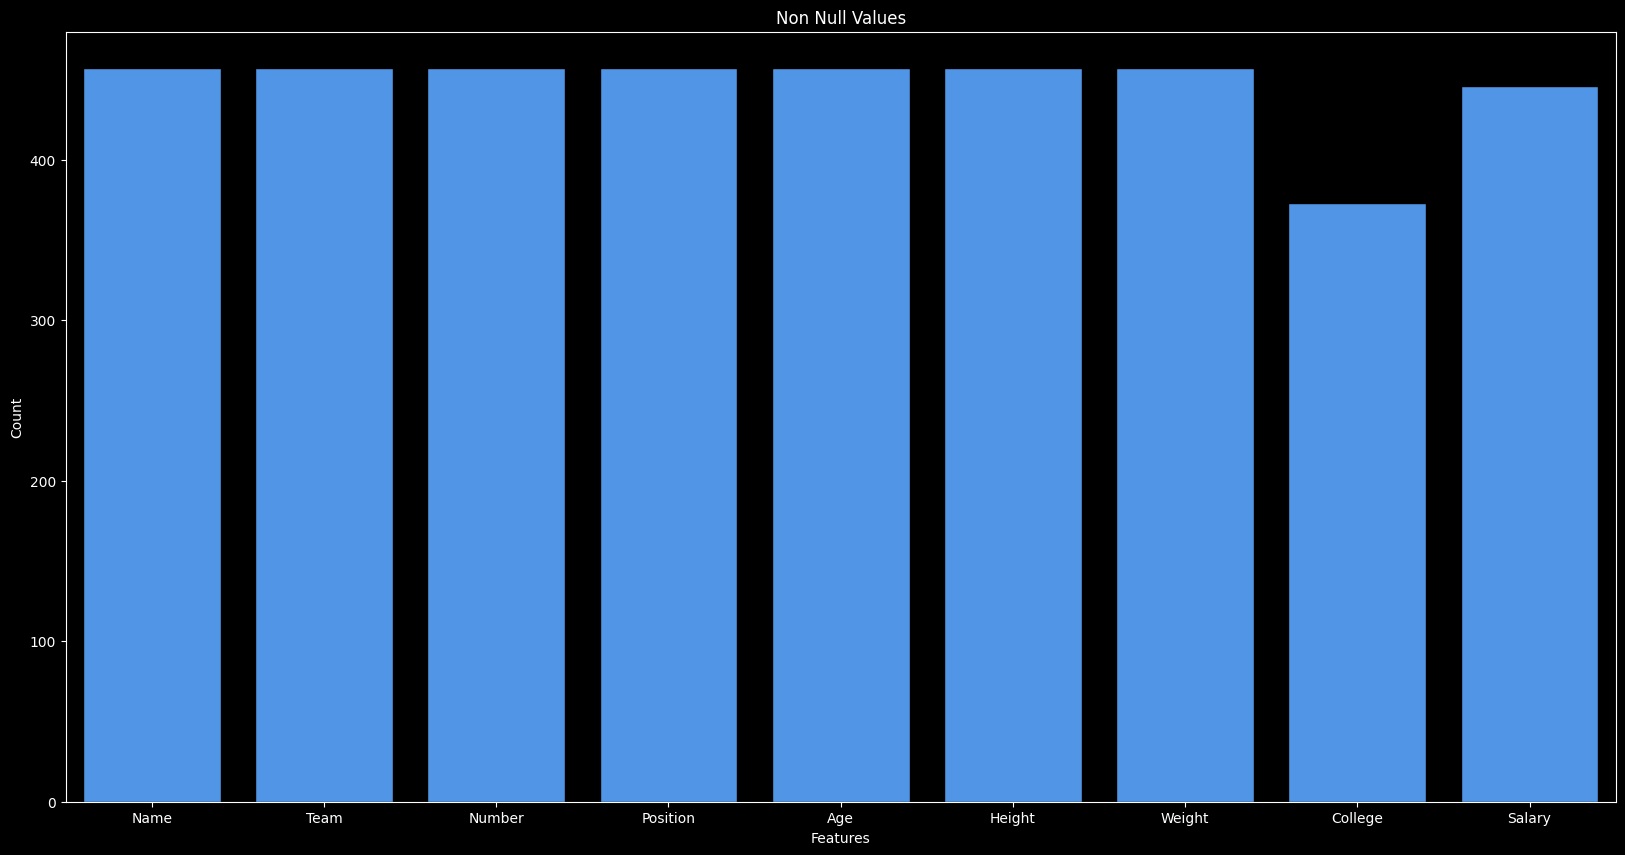

In [63]:
non_null_data = df.notnull().sum()
plt.figure(figsize=(20, 10))
sns.barplot(x=non_null_data.index, y=non_null_data, color="#3894FF", edgecolor="black")
plt.title("Non Null Values")
plt.xlabel("Features")
plt.ylabel("Count")

In [64]:
df = df.dropna(subset=["Name"])

In [65]:
null_df = pd.DataFrame(df.isnull().sum()).reset_index()
null_df.columns = ["Feature", "Count"]
null_df

,Feature,Count
0,Name,0
1,Team,0
2,Number,0
3,Position,0
4,Age,0
5,Height,0
6,Weight,0
7,College,84
8,Salary,11


In [66]:
df["College"] = df["College"].ffill()

In [67]:
null_df = pd.DataFrame(df.isnull().sum()).reset_index()
null_df.columns = ["Feature", "Count"]
null_df

,Feature,Count
0,Name,0
1,Team,0
2,Number,0
3,Position,0
4,Age,0
5,Height,0
6,Weight,0
7,College,0
8,Salary,11


In [68]:
mean_salary = df["Salary"].mean()
df["Salary"] = df["Salary"].fillna(mean_salary)

In [69]:
null_df = pd.DataFrame(df.isnull().sum()).reset_index()
null_df.columns = ["Feature", "Count"]
null_df

,Feature,Count
0,Name,0
1,Team,0
2,Number,0
3,Position,0
4,Age,0
5,Height,0
6,Weight,0
7,College,0
8,Salary,0


In [70]:
# for col in ["Team", "Number", "Position", "Age", "Height", "Weight"]:
#     df[col] = df[col].fillna(df[col].mode()[0])

In [71]:
null_df = pd.DataFrame(df.isnull().sum()).reset_index()
null_df.columns = ["Feature", "Count"]
null_df

,Feature,Count
0,Name,0
1,Team,0
2,Number,0
3,Position,0
4,Age,0
5,Height,0
6,Weight,0
7,College,0
8,Salary,0


In [72]:
df.size

4113

In [73]:
df = df.drop_duplicates()

In [74]:
df.size

4113

In [75]:
df[["Height"]]

,Height
0,6-2
1,6-6
2,6-5
3,6-5
4,6-10
...,...
452,6-10
453,6-3
454,6-1
455,7-3


In [76]:
def convert_to_cm(height):
    if pd.isnull(height):
        return np.nan
    feet, inches = height.split("-")
    return int(int(feet) * 30.48 + int(inches) * 2.54)

In [77]:
df["Height"] = df["Height"].apply(convert_to_cm)

In [78]:
df[["Height"]]

,Height
0,187
1,198
2,195
3,195
4,208
...,...
452,208
453,190
454,185
455,220


In [79]:
numerics_cols = df.select_dtypes(include=["float64"]).columns
numerics_cols

Index(['Number', 'Age', 'Weight', 'Salary'], dtype='object')

In [80]:
for col in numerics_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype(int)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      457 non-null    object
 1   Team      457 non-null    object
 2   Number    457 non-null    int64 
 3   Position  457 non-null    object
 4   Age       457 non-null    int64 
 5   Height    457 non-null    int64 
 6   Weight    457 non-null    int64 
 7   College   457 non-null    object
 8   Salary    457 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.7+ KB


In [82]:
object_cols = df.select_dtypes(include=["object"]).columns
for col in object_cols:
    df[col] = df[col].astype("category")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      457 non-null    category
 1   Team      457 non-null    category
 2   Number    457 non-null    int64   
 3   Position  457 non-null    category
 4   Age       457 non-null    int64   
 5   Height    457 non-null    int64   
 6   Weight    457 non-null    int64   
 7   College   457 non-null    category
 8   Salary    457 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 49.9 KB


In [84]:
df = pd.get_dummies(
    df,
    columns=["Team", "Position"],
)

In [85]:
non_cat_cols = list(df.select_dtypes(include=["float64", "bool"]))
non_cat_cols
df[non_cat_cols] = df[non_cat_cols].astype(int)

In [86]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

college_encoded = ohe.fit_transform(df[["College"]])
college_encoded_df = pd.DataFrame(
    college_encoded, columns=ohe.get_feature_names_out(["College"])
).astype(int)


df = pd.concat([df.drop("College", axis=1), college_encoded_df], axis=1)

In [87]:
print(f"Columns after One Hot Encoding:\n\t {list(df.columns)}")

Columns after One Hot Encoding:
	 ['Name', 'Number', 'Age', 'Height', 'Weight', 'Salary', 'Team_Atlanta Hawks', 'Team_Boston Celtics', 'Team_Brooklyn Nets', 'Team_Charlotte Hornets', 'Team_Chicago Bulls', 'Team_Cleveland Cavaliers', 'Team_Dallas Mavericks', 'Team_Denver Nuggets', 'Team_Detroit Pistons', 'Team_Golden State Warriors', 'Team_Houston Rockets', 'Team_Indiana Pacers', 'Team_Los Angeles Clippers', 'Team_Los Angeles Lakers', 'Team_Memphis Grizzlies', 'Team_Miami Heat', 'Team_Milwaukee Bucks', 'Team_Minnesota Timberwolves', 'Team_New Orleans Pelicans', 'Team_New York Knicks', 'Team_Oklahoma City Thunder', 'Team_Orlando Magic', 'Team_Philadelphia 76ers', 'Team_Phoenix Suns', 'Team_Portland Trail Blazers', 'Team_Sacramento Kings', 'Team_San Antonio Spurs', 'Team_Toronto Raptors', 'Team_Utah Jazz', 'Team_Washington Wizards', 'Position_C', 'Position_PF', 'Position_PG', 'Position_SF', 'Position_SG', 'College_Alabama', 'College_Arizona', 'College_Arizona State', 'College_Arkansas', '

In [88]:
print(f"Min Height = {df["Height"].min()}, Max Height = {df["Height"].max()}")

Min Height = 175, Max Height = 220


In [89]:
bins = [170, 180, 190, 200, 210, 220]
labels = [175, 185, 195, 205, 215]
df["Height"] = pd.cut(df["Height"], bins=bins, labels=labels)
df

,Name,Number,Age,Height,Weight,Salary,Team_Atlanta Hawks,Team_Boston Celtics,Team_Brooklyn Nets,Team_Charlotte Hornets,...,College_Washington State,College_Weber State,College_Westchester CC,College_Western Carolina,College_Western Kentucky,College_Western Michigan,College_Wichita State,College_Wisconsin,College_Wyoming,College_Xavier
0,Avery Bradley,0,25,185,180,7730337,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jae Crowder,99,25,195,235,6796117,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,John Holland,30,27,195,205,4842684,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,R.J. Hunter,28,22,195,185,1148640,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Jonas Jerebko,8,29,205,231,5000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,41,20,205,234,2239800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453,Shelvin Mack,8,26,185,203,2433333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,Raul Neto,25,24,185,179,900000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,Tibor Pleiss,21,26,215,256,2900000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
print(f"Min Age = {df["Age"].min()}, Max Age = {df["Age"].max()}")

Min Age = 19, Max Age = 40


In [91]:
bins = [18, 22, 26, 30, 34, 38, 42]
labels = [20, 24, 28, 32, 36, 40]

df["Age"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)
df["Age"] = df["Age"]
df

,Name,Number,Age,Height,Weight,Salary,Team_Atlanta Hawks,Team_Boston Celtics,Team_Brooklyn Nets,Team_Charlotte Hornets,...,College_Washington State,College_Weber State,College_Westchester CC,College_Western Carolina,College_Western Kentucky,College_Western Michigan,College_Wichita State,College_Wisconsin,College_Wyoming,College_Xavier
0,Avery Bradley,0,24,185,180,7730337,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jae Crowder,99,24,195,235,6796117,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,John Holland,30,28,195,205,4842684,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,R.J. Hunter,28,20,195,185,1148640,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Jonas Jerebko,8,28,205,231,5000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,41,20,205,234,2239800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453,Shelvin Mack,8,24,185,203,2433333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,Raul Neto,25,24,185,179,900000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,Tibor Pleiss,21,24,215,256,2900000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 456
Columns: 159 entries, Name to College_Xavier
dtypes: category(3), int64(156)
memory usage: 582.5 KB


In [93]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Height"] = label_encoder.fit_transform(df["Height"])
df["Age"] = label_encoder.fit_transform(df["Age"])

In [94]:
df[["Height", "Age"]]

,Height,Age
0,1,1
1,2,1
2,2,2
3,2,0
4,3,2
...,...,...
452,3,0
453,1,1
454,1,1
455,4,1


In [95]:
from sklearn.preprocessing import StandardScaler

numeric_pd = df.select_dtypes(include=["int64", "float64"])
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(numeric_pd.values)
standardized_df = pd.DataFrame(
    np.round(standardized_data, 2),
    columns=numeric_pd.columns,
)
standardized_df

,Number,Age,Height,Weight,Salary,Team_Atlanta Hawks,Team_Boston Celtics,Team_Brooklyn Nets,Team_Charlotte Hornets,Team_Chicago Bulls,...,College_Washington State,College_Weber State,College_Westchester CC,College_Western Carolina,College_Western Kentucky,College_Western Michigan,College_Wichita State,College_Wisconsin,College_Wyoming,College_Xavier
0,-1.11,-0.55,-1.58,-1.58,0.56,-0.18,5.43,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
1,5.10,-0.55,-0.46,0.51,0.38,-0.18,5.43,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
2,0.77,0.34,-0.46,-0.63,-0.00,-0.18,5.43,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
3,0.65,-1.44,-0.46,-1.39,-0.72,-0.18,5.43,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
4,-0.61,0.34,0.66,0.36,0.03,-0.18,5.43,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,1.46,-1.44,0.66,0.47,-0.50,-0.18,-0.18,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
453,-0.61,-0.55,-1.58,-0.70,-0.47,-0.18,-0.18,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
454,0.46,-0.55,-1.58,-1.61,-0.76,-0.18,-0.18,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05
455,0.21,-0.55,1.77,1.31,-0.38,-0.18,-0.18,-0.18,-0.18,-0.18,...,-0.08,-0.05,-0.05,-0.05,-0.07,-0.05,-0.05,-0.11,-0.05,-0.05


In [96]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalized_data = normalizer.fit_transform(numeric_pd.values)
normalized_df = pd.DataFrame(np.round(normalized_data), columns=numeric_pd.columns)
normalized_df

,Number,Age,Height,Weight,Salary,Team_Atlanta Hawks,Team_Boston Celtics,Team_Brooklyn Nets,Team_Charlotte Hornets,Team_Chicago Bulls,...,College_Washington State,College_Weber State,College_Westchester CC,College_Western Carolina,College_Western Kentucky,College_Western Michigan,College_Wichita State,College_Wisconsin,College_Wyoming,College_Xavier
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Count')

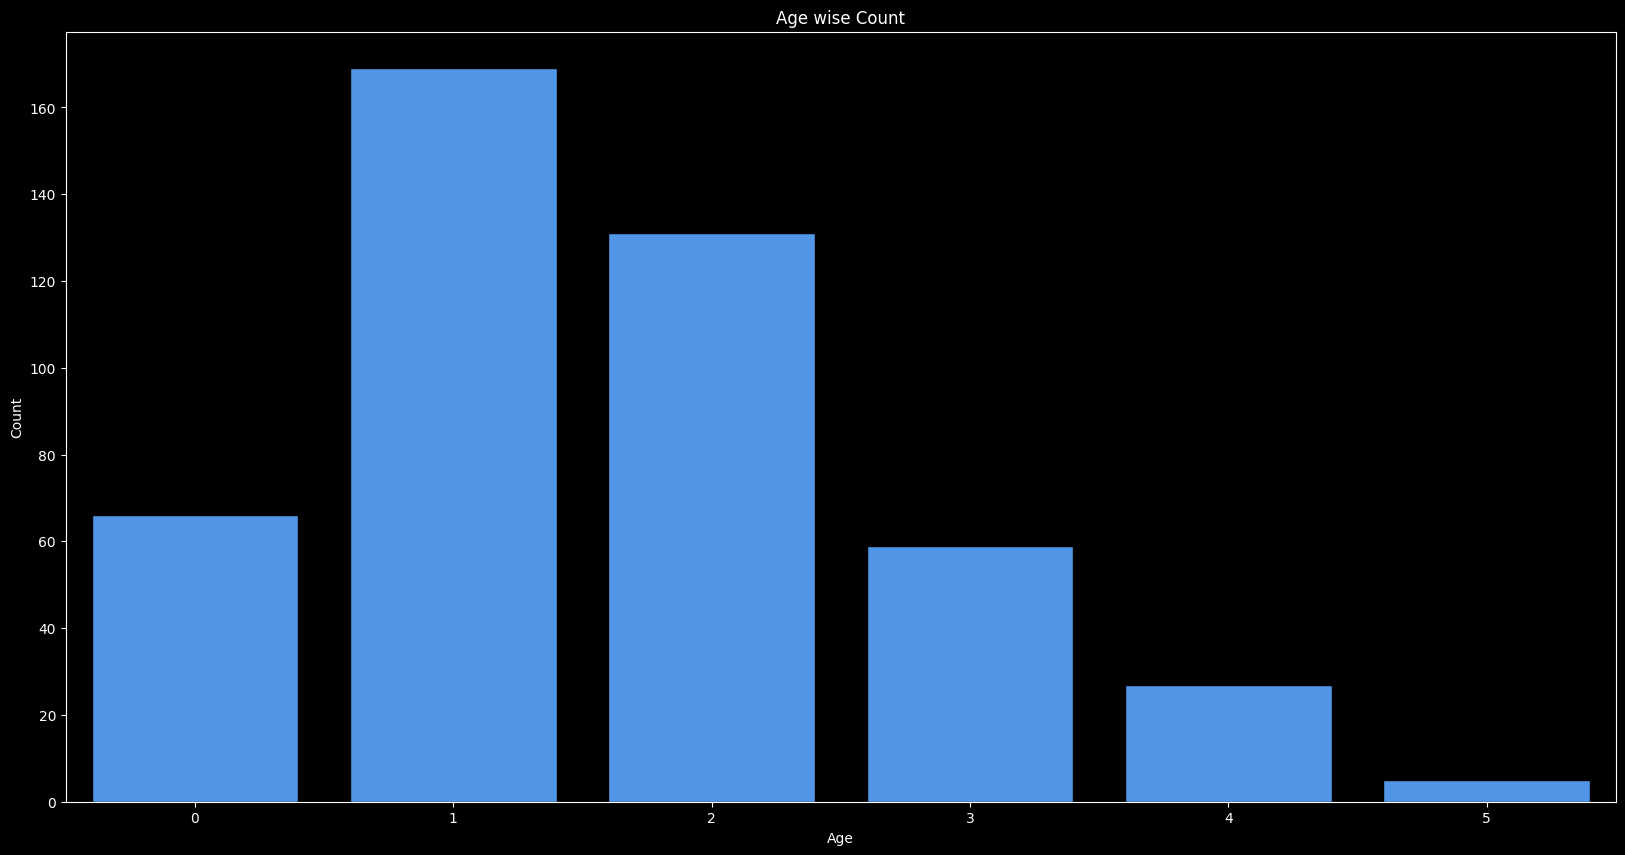

In [97]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="Age", color="#3894FF", edgecolor="black")
plt.title("Age wise Count")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Salary')

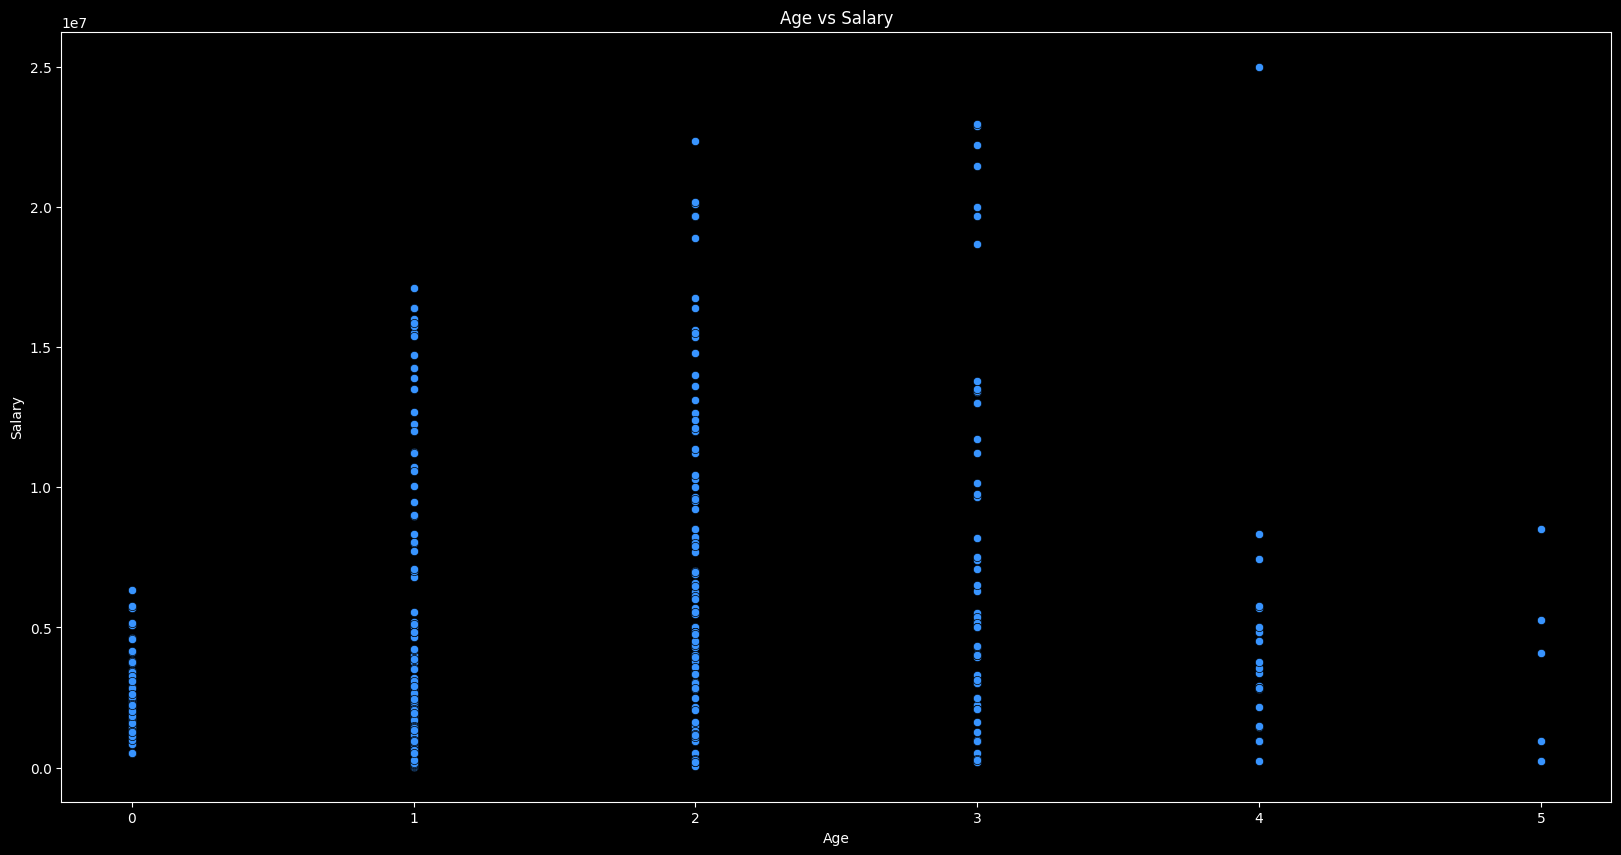

In [98]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Age", y="Salary", color="#3894FF", edgecolor="black")
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")